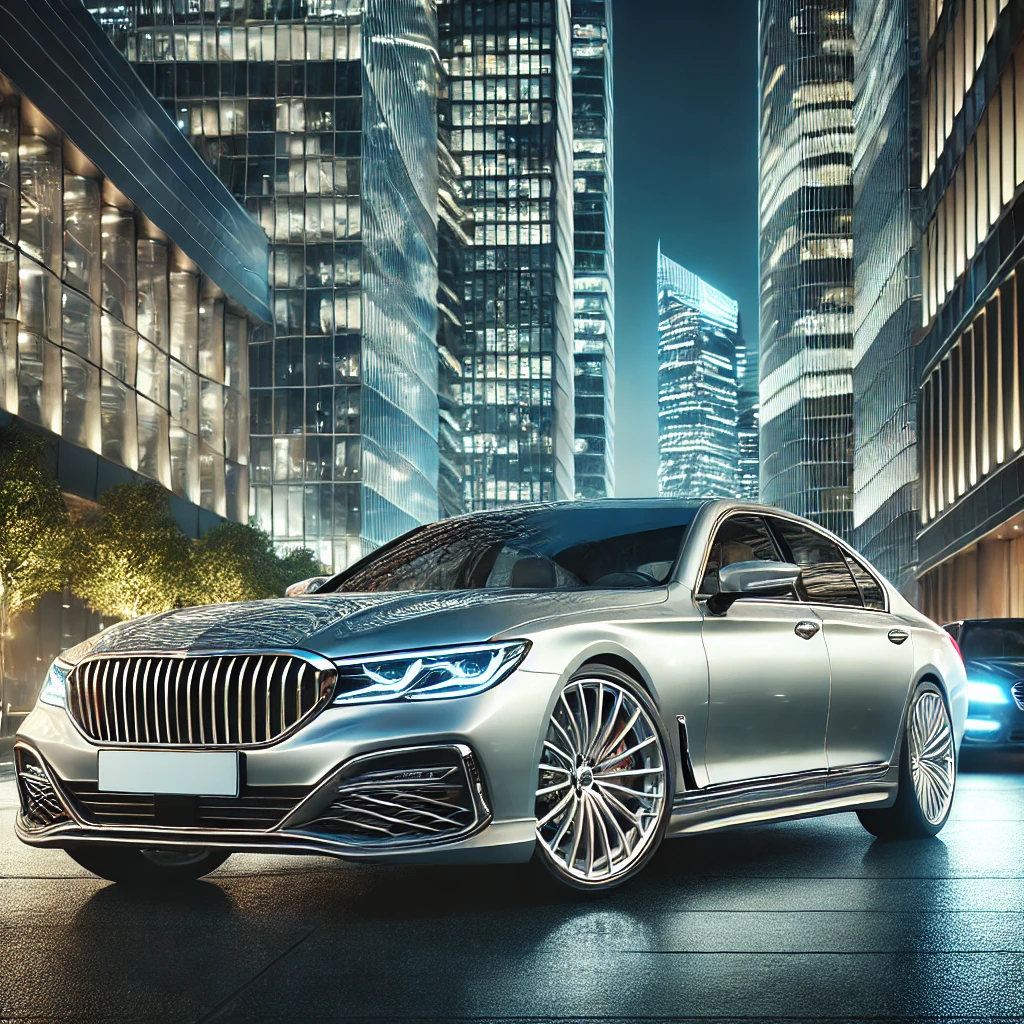
.

# Clustering

## Hierarchical algoritm

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Dataset
Ushbu darsda avtomobillarni klasterlaymiz.

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv"
df = pd.read_csv(url)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [4]:
df['partition'].value_counts()

partition
0.0    157
1.0      2
Name: count, dtype: int64

In [5]:
df['type'].value_counts()

type
0.000     116
1.000      41
$null$      2
Name: count, dtype: int64

In [6]:
df[df['type']=='$null$']

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0
158,NaN,newTruck,$null$,$null$,$null$,34.200,3.500,167.000,109.800,75.200,188.400,4.508,17.200,26.000,$null$,1.0


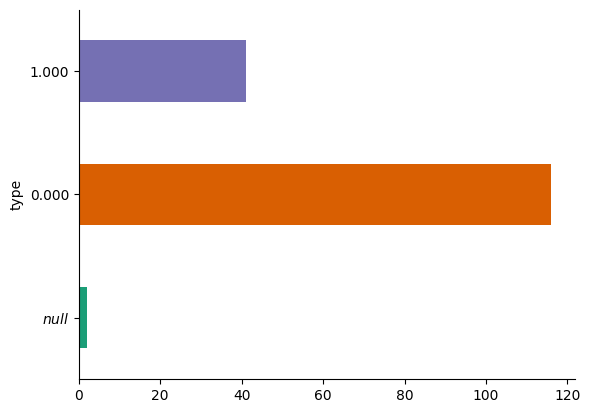

In [7]:
# @title type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df.isna().sum()

manufact     2
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


### Cleaning dataset

In [17]:
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
df.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### Checking manufact types and quantity

In [11]:
print(df['manufact'].unique())
print(df['manufact'].nunique())

['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Lexus' 'Lincoln'
 'Mitsubishi' 'Mercury' 'Mercedes-Benz' 'Nissan' 'Oldsmobile' 'Plymouth'
 'Pontiac' 'Porsche' 'Saab' 'Saturn' 'Subaru' 'Toyota' 'Volkswagen'
 'Volvo' nan]
30


#### We have 30 car companies


### Selecting appropriate columns to cluster cars 

In [19]:
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x = featureset.values #numpy array
min_max_scaler = StandardScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[-1.18851919, -0.70760105, -0.76427293, -1.10660259, -1.11075197,
        -1.15208399, -1.2208532 ,  0.88524147],
       [ 0.14398898,  0.74935391,  0.09649372, -0.25312531,  0.37576661,
         0.32449122, -0.16219228,  0.20113809],
       [ 0.42952644,  0.49224421,  0.90736086,  0.05981636,  0.64406509,
         0.88451349,  0.0495399 , -0.4829653 ],
       [-1.18851919, -0.53619459, -0.58962463, -0.85055941, -0.7046786 ,
        -0.54833627, -0.37392447,  0.65720701],
       [-0.23672764,  0.32083775,  0.171343  ,  1.39693076,  0.31050482,
         0.39848816,  0.18187252, -0.4829653 ]])

## Clustering

#### Hierarchiral Clustering is used from `Scipy`

#### Intially, Build 'D' matrix that contains euclidean distances between clusters:


In [21]:
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 3.36844337, 4.35035558, ..., 1.58664043, 1.41561202,
        1.09846776],
       [3.36844337, 0.        , 1.34220416, ..., 2.24296391, 3.83363452,
        3.63938637],
       [4.35035558, 1.34220416, 0.        , ..., 3.08960352, 4.66696666,
        4.48597837],
       ...,
       [1.58664043, 2.24296391, 3.08960352, ..., 0.        , 2.3320982 ,
        2.01293863],
       [1.41561202, 3.83363452, 4.66696666, ..., 2.3320982 , 0.        ,
        0.79207424],
       [1.09846776, 3.63938637, 4.48597837, ..., 2.01293863, 0.79207424,
        0.        ]], shape=(117, 117))


### Train hierarchical cluster model and assign it to Z variable

In [24]:
Z = hierarchy.linkage(D)

/var/folders/25/525jtcfx3d549_lxzx7k_p8m0000gn/T/ipykernel_19369/457834126.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D)


### Dendogram

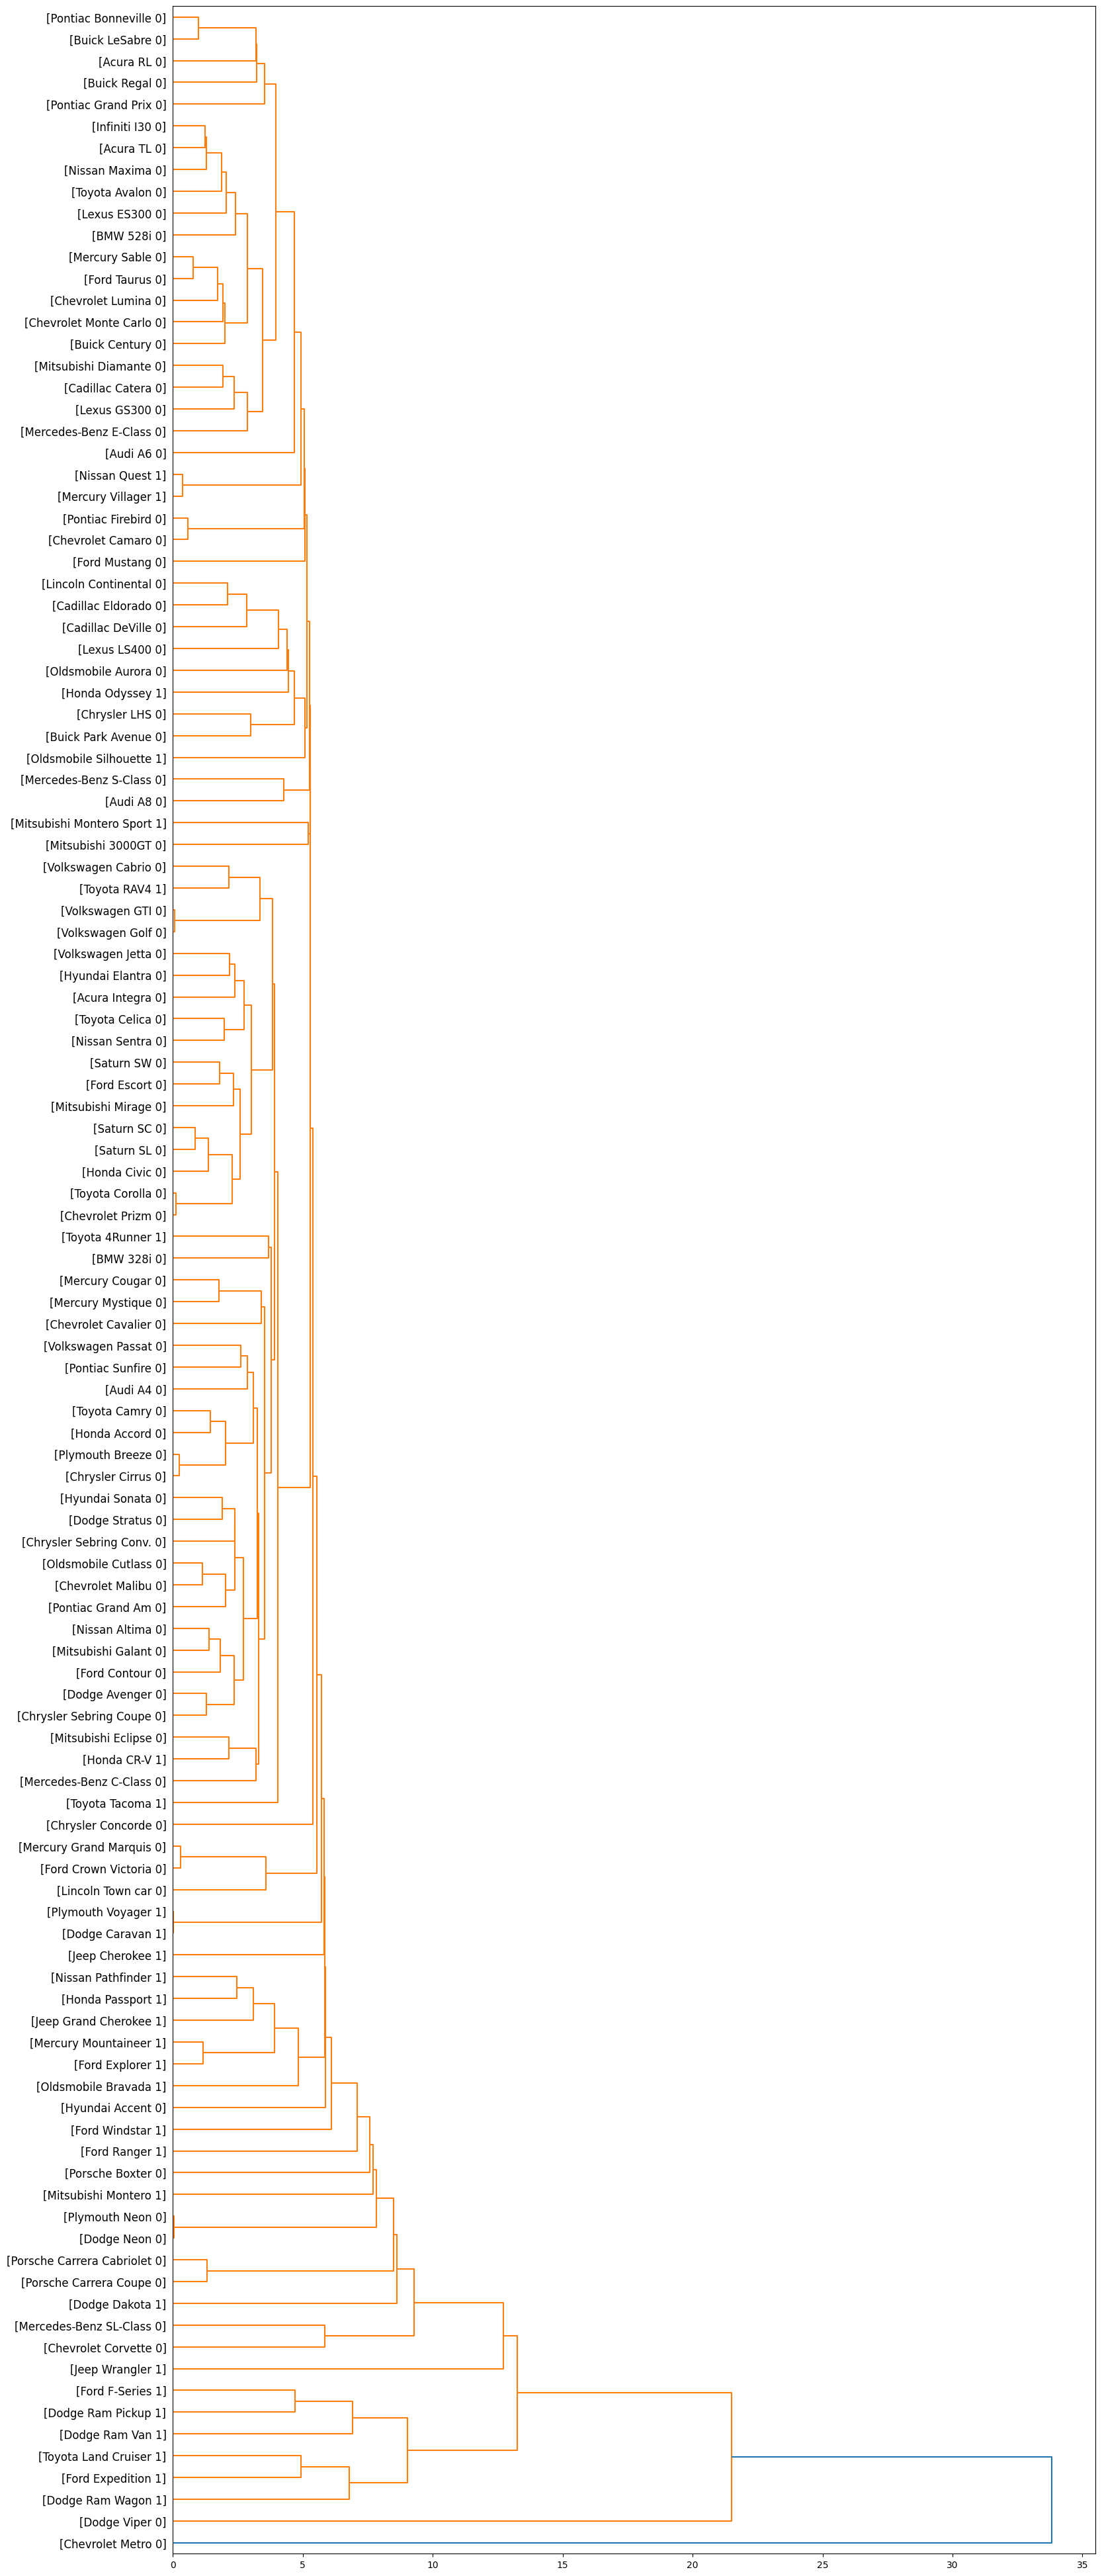

In [28]:
fig = plt.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Klasterlar sonini o'zimiz belgilab, dendogramni qayerdan kesishni ko'rsatishimiz mumkin.

In [29]:
from scipy.cluster.hierarchy import fcluster
k = 3 # 3 clusters
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

## Clustering with `scikit`

In [30]:
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

In [31]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(D)

agglom.labels_

/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 4, 0, 0, 0, 0, 1, 4,
       2, 0, 0, 0, 0, 0, 4, 0, 0, 3, 3, 1, 3, 1, 0, 4, 0, 0, 0, 1, 0, 1,
       1, 0, 3, 4, 0, 0, 0, 1, 4, 4, 0, 0, 4, 0, 0, 0, 0, 1, 1, 1, 4, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0, 0, 0, 1,
       0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4,
       0, 1, 4, 4, 0, 4, 4])

### Klasterlar haqida nima deya olamiz?

In [32]:
df['cluster'] = agglom.labels_


# Now, proceed with calculating the mean values for each cluster and type
df.head()



,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,4
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


In [33]:
agg_cars = df.groupby(['cluster','type'])[['horsepow','engine_s','mpg','price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster type                                            
0       0.0   185.203704  2.907407  24.681481  26.280222
        1.0   173.200000  3.226667  20.866667  24.016067
1       0.0   267.666667  4.566667  21.416667  46.417417
        1.0   188.750000  3.637500  18.625000  28.840000
2       0.0    55.000000  1.000000  45.000000   9.235000
3       0.0   450.000000  8.000000  16.000000  69.725000
        1.0   208.333333  4.566667  17.000000  21.656667
4       0.0   118.500000  1.890000  29.550000  14.226100
        1.0   129.666667  2.300000  22.333333  14.292000

### Clustering cars with `K-means`

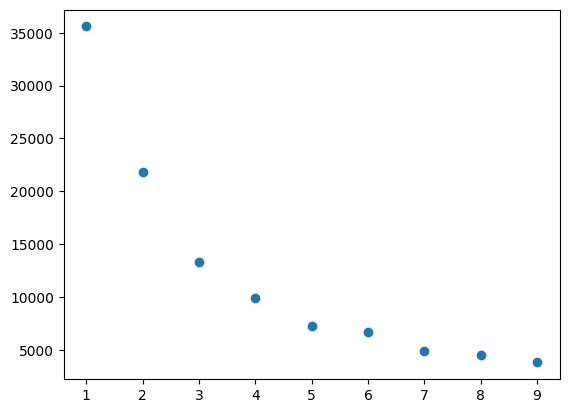

In [36]:
from sklearn.cluster import KMeans
ks  = range(1,10)
inertias = []
for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(D)
  inertias.append(model.inertia_)
plt.plot(ks, inertias, 'o')
plt.show()

Line plot shows that 3 should be selected based on Elbow method.

### Let's try with `Silhouette` method to find `k` value

In [37]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(feature_mtx)
    score = silhouette_score(feature_mtx, kmeans.labels_)
    print(f'For k={k}, Silhouette Score = {score}')

For k=2, Silhouette Score = 0.367445551183743
For k=3, Silhouette Score = 0.3095793573868795
For k=4, Silhouette Score = 0.27201027584603443
For k=5, Silhouette Score = 0.23932612344916493
For k=6, Silhouette Score = 0.24714233565798338
For k=7, Silhouette Score = 0.2504045830336056
For k=8, Silhouette Score = 0.20457869951324487
For k=9, Silhouette Score = 0.20716866357012817


if score is high, it means better clustering,but it is perfect solution based on Silhouette score and One more method to find 'k' called `Davies Bouldin Score`

In [38]:
from sklearn.metrics import davies_bouldin_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(feature_mtx)
    db_score = davies_bouldin_score(feature_mtx, kmeans.labels_)
    print(f'For k={k}, Davies-Bouldin Score = {db_score}')


For k=2, Davies-Bouldin Score = 0.9917099118957642
For k=3, Davies-Bouldin Score = 1.15696678846611
For k=4, Davies-Bouldin Score = 1.3362881059081126
For k=5, Davies-Bouldin Score = 1.3276175730888287
For k=6, Davies-Bouldin Score = 1.202989035786892
For k=7, Davies-Bouldin Score = 1.204355515032321
For k=8, Davies-Bouldin Score = 1.2598687418717347
For k=9, Davies-Bouldin Score = 1.140774860800163


if Davies-Bouldin Score is low , it means better clustering

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(feature_mtx)
df['cluster'] = kmeans.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


In [40]:
df['type'].value_counts(normalize=True)

type
0.0    0.752137
1.0    0.247863
Name: proportion, dtype: float64

In [41]:
df[['manufact','cluster']].groupby('cluster').count()

,manufact
cluster,
0,16
1,43
2,58


In [42]:
import sqlite3
conn = sqlite3.connect(":memory:")
df.to_sql('cars', conn, if_exists='replace', index=False)
# Run SQL Query
query = "SELECT manufact, cluster  FROM cars GROUP BY manufact"
result = pd.read_sql(query, conn)

# Close connection
conn.close()

print(result)


         manufact  cluster
0           Acura        1
1            Audi        1
2             BMW        2
3           Buick        2
4        Cadillac        0
5       Chevrolet        1
6        Chrysler        1
7           Dodge        1
8            Ford        1
9           Honda        1
10        Hyundai        1
11       Infiniti        2
12           Jeep        1
13          Lexus        2
14        Lincoln        2
15  Mercedes-Benz        1
16        Mercury        1
17     Mitsubishi        1
18         Nissan        1
19     Oldsmobile        2
20       Plymouth        1
21        Pontiac        1
22        Porsche        1
23         Saturn        1
24         Toyota        1
25     Volkswagen        1


## t-SNE(Distributed Stochastic Neighbor Embedding) 
#### It is used for Dimentionality Reduction and Visualization
#### t-SNE transforms high-dimentional data into 2D/3D for visualization
#### Helps identifying patterns but does not explicitly form clusters


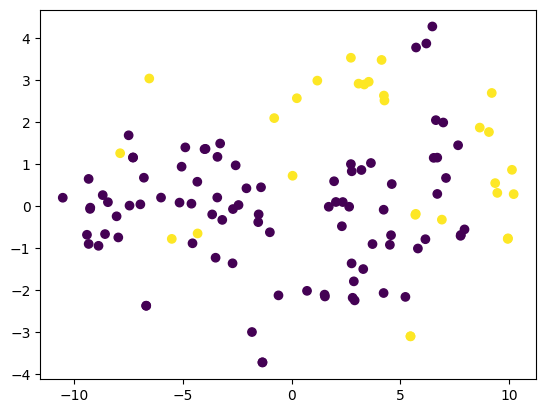

In [46]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 100)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(feature_mtx)


# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c= df['type'].tolist())
plt.show()

**What do you think which clustering method is better to find k value ?**